# ROAD TRIP ANALYSIS PROJECT

 ## DOMAIN : MACHINE LEARNING USING PYTHON 
 ## ALGORITHUM : GENETIC ALGORIYHUM 


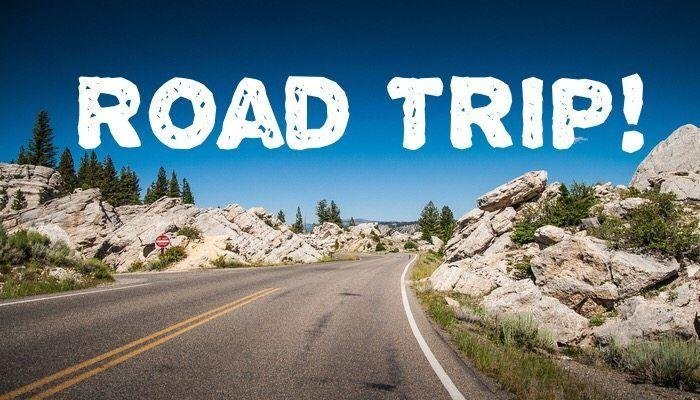

# Importing necesary Models.

In [110]:
import pandas as pd
import numpy as np
import xgboost as xgb

import pickle
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

# Import data and take a look at it

##  train.csv - the training set (contains 1458644 trip records)

In [111]:
sample_df = pd.read_csv("train.csv") 

In [112]:
sample_df.shape

(1458644, 11)

# Data Fields 
###  id - a unique identifier for each trip
### vendor_id - a code indicating the provider associated with the trip record
### pickup_datetime - date and time when the meter was engaged
### dropoff_datetime - date and time when the meter was disengaged
### passenger_count - the number of passengers in the vehicle (driver entered value)
### pickup_longitude - the longitude where the meter was engaged
### pickup_latitude - the latitude where the meter was engaged
### dropoff_longitude - the longitude where the meter was disengaged
### dropoff_latitude - the latitude where the meter was disengaged
### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to        the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store            and forward trip
### trip_duration - duration of the trip in seconds

In [113]:
sample_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [135]:
sample_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,latitude_difference,longitude_difference,trip_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,5.515396e-03,1.599137e+01,3.516818e+00,1.550402e+01,3.050375e+00,1.360648e+01,2.959016e+01,8.786065e-04,7.035795e-05,3.171463e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,7.406066e-02,8.729131e+01,1.681038e+00,8.703135e+00,1.954039e+00,6.399693e+00,1.732471e+01,3.468794e-02,4.656210e-02,4.124431e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.113049e+01,-7.552940e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,0.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,1.500000e+01,-1.342010e-02,-1.126862e-02,1.111738e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,0.000000e+00,1.100000e+01,4.000000e+00,1.500000e+01,3.000000e+00,1.400000e+01,3.000000e+01,2.059937e-04,1.342773e-03,1.891906e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,0.000000e+00,1.800000e+01,5.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01,4.500000e+01,1.399231e-02,1.393890e-02,3.487822e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,5.877100e+04,6.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01,5.900000e+01,5.354797e+00,3.643837e+00,8.918382e+02


# Data Preprocessing

In [114]:
sample_df["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

# Convert character variables to numeric 

In [115]:
f = lambda x: 0 if x == 'N' else 1

sample_df["store_and_fwd_flag"] = sample_df["store_and_fwd_flag"].apply(lambda x: f(x))            

In [116]:

#Check result
sample_df["store_and_fwd_flag"].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


## Engineer features

# First, convert datetime strings into datetime

In [117]:
sample_df["dropoff_datetime"] = pd.to_datetime(sample_df["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')
sample_df["pickup_datetime"] = pd.to_datetime(sample_df["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

# Now construct other variables, like month, date, etc.

In [118]:
sample_df["pickup_month"] = sample_df["pickup_datetime"].dt.month
sample_df["pickup_day"] = sample_df["pickup_datetime"].dt.day
sample_df["pickup_weekday"] = sample_df["pickup_datetime"].dt.weekday #sample_df["pickup_weekday"] = sample_df["pickup_datetime"].dt.weekday_name
sample_df["pickup_hour"] = sample_df["pickup_datetime"].dt.hour
sample_df["pickup_minute"] = sample_df["pickup_datetime"].dt.minute

# Get latitude and longitude differences 

In [119]:
sample_df["latitude_difference"] = sample_df["dropoff_latitude"] - sample_df["pickup_latitude"]
sample_df["longitude_difference"] = sample_df["dropoff_longitude"] - sample_df["pickup_longitude"]

# Convert duration to minutes for easier interpretation

In [120]:
sample_df["trip_duration"] = sample_df["trip_duration"].apply(lambda x: round(x/60))   

# Convert trip distance from longitude and latitude differences to Manhattan distance.

In [121]:
sample_df["trip_distance"] = 0.621371 * 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(sample_df["latitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(sample_df["latitude_difference"]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(sample_df["longitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(sample_df["longitude_difference"]) * np.pi / 180) / 2)))))))

In [122]:
sample_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,latitude_difference,longitude_difference,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,8,3,14,0,17,24,-0.002335,0.017525,1.372146
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,11,6,12,6,0,43,-0.007412,-0.019066,1.829440
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,35,1,19,1,11,35,-0.053852,-0.026306,5.538397
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,7,4,6,2,19,32,-0.013252,-0.002228,1.069567
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,7,3,26,5,13,30,-0.010689,0.000130,0.747485


# Modeling

In [123]:
X = sample_df.drop(["trip_duration", "id", "vendor_id", "pickup_datetime", "dropoff_datetime"], axis=1)
y = sample_df["trip_duration"]

# Split the data into training, test, and valdiation sets

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

# Define evaluation metric

In [125]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

# XGBoost parameters

In [126]:
 params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.05,
    'max_depth':          14,
    'subsample':          0.9,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1,
    'feval':              'rmsle'
}

In [127]:
nrounds =50

# Define train and validation sets

In [128]:
dtrain = xgb.DMatrix(X_train, np.log(y_train+1))
dval = xgb.DMatrix(X_val, np.log(y_val+1))

#this is for tracking the error
watchlist = [(dval, 'eval'), (dtrain, 'train')]

# Train model

In [129]:
gbm = xgb.train(params,
                dtrain,
                num_boost_round = nrounds,
                evals = watchlist,
                verbose_eval = True
                )  # rmse means root mean squaed lograrithmic error , since it reduces error magnitude.

[13:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "feval", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-rmse:2.00599	train-rmse:2.00537
[1]	eval-rmse:1.90977	train-rmse:1.90920
[2]	eval-rmse:1.81870	train-rmse:1.81809
[3]	eval-rmse:1.73243	train-rmse:1.73183
[4]	eval-rmse:1.65036	train-rmse:1.64983
[5]	eval-rmse:1.57251	train-rmse:1.57196
[6]	eval-rmse:1.49885	train-rmse:1.49825
[7]	eval-rmse:1.42934	train-rmse:1.42875
[8]	eval-rmse:1.36317	train-rmse:1.36246
[9]	eval-rmse:1.30042	train-rm

# Test predictions

In [130]:
pred = np.exp(gbm.predict(xgb.DMatrix(X_test))) - 1

# Use mean absolute error to get a basic estimate of the error

In [131]:
mae = (abs(pred - y_test)).mean()
mae

5.93556022644043

# Take a look at feature importance

In [132]:
feature_scores = gbm.get_fscore()
feature_scores

{'passenger_count': 6969.0,
 'pickup_longitude': 38102.0,
 'pickup_latitude': 28957.0,
 'dropoff_longitude': 23719.0,
 'dropoff_latitude': 20553.0,
 'store_and_fwd_flag': 597.0,
 'pickup_month': 7910.0,
 'pickup_day': 12778.0,
 'pickup_weekday': 8700.0,
 'pickup_hour': 10238.0,
 'pickup_minute': 18252.0,
 'latitude_difference': 26162.0,
 'longitude_difference': 27275.0,
 'trip_distance': 27082.0}

# This is not very telling, so let's scale the features

In [133]:
summ = 0
for key in feature_scores:
    summ = summ + feature_scores[key]

for key in feature_scores:
    feature_scores[key] = feature_scores[key] / summ

feature_scores

{'passenger_count': 0.027085746266916445,
 'pickup_longitude': 0.14808740196040326,
 'pickup_latitude': 0.11254440445560332,
 'dropoff_longitude': 0.09218637045558777,
 'dropoff_latitude': 0.07988138083282159,
 'store_and_fwd_flag': 0.0023203028442171213,
 'pickup_month': 0.030743041034769564,
 'pickup_day': 0.04966303139599058,
 'pickup_weekday': 0.03381345853381734,
 'pickup_hour': 0.039791056145887585,
 'pickup_minute': 0.07093830404129128,
 'latitude_difference': 0.10168134507606084,
 'longitude_difference': 0.10600713580573197,
 'trip_distance': 0.1052570211509013}

# Save the model

In [136]:
filename = "xgb_model.sav"
pickle.dump(gbm, open(filename, 'wb'))

## Now, the machine learning part is only the first step of the project. Once the model is trained and saved ( i.e xgb_model.sav) , we can start on the genetic algorithm. The genetic algorithm a population of candidate solutions to an optimization problem is evolved toward better solutions, and each candidate solution has a set of properties which can be mutated and altered. Basically, we start with a random solution to the problem and try to “evolve” the solution based on some fitness metric. The result is not guaranteed to be the best solution possible, but it should be close enough.

# ROAD TRIP ANALYSIS USING GENETIC ALGORITHUM. 

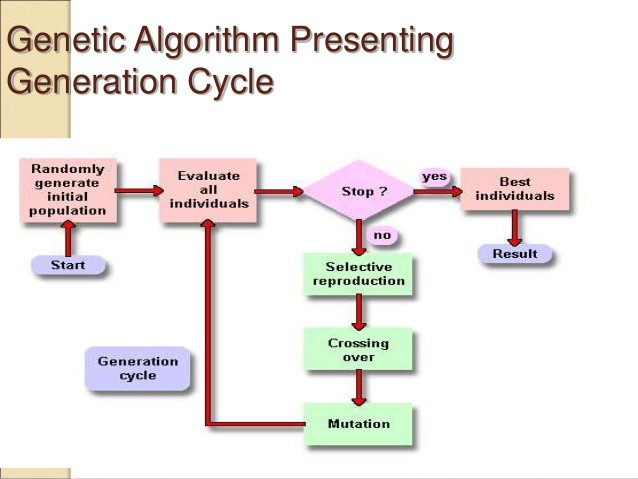

# Importing necessary Libraries.

In [137]:
import pandas as pd
import numpy as np
import xgboost as xgb

from copy import copy
import datetime
import pickle
from geopy.geocoders import Nominatim
import folium 

# Open Saved  XGB Model

In [138]:
filename = "xgb_model.sav"

In [139]:
loaded_model = pickle.load(open(filename, 'rb'))

# Genetic Algorithm Implementation.

## Sample date

In [140]:
#Sample date

date_list = [4, 6, 2016] #April 6, 2016

year = int(date_list[2])
month = int(date_list[1])
day = int(date_list[0])

my_date = datetime.date(year, month, day)

# Sample test locations
## 11 waypoints on the map

In [141]:
test_locations = {'L1': (40.819688, -73.915091),
                  'L2': (40.815421, -73.941761),
                  'L3': (40.764198, -73.910785),
                  'L4': (40.768790, -73.953285),
                  'L5': (40.734851, -73.952950),
                  'L6': (40.743613, -73.977998),
                  'L7': (40.745313, -73.993793),
                  'L8': (40.662713, -73.946101),
                  'L9': (40.703761, -73.886496),
                  'L10': (40.713620, -73.943076),
                  'L11': (40.725212, -73.809179)
             }

In [142]:
import folium 

m=folium.Map(location=[40.819688, -73.915091])
m

In [143]:
#Sample test locations

test_locations1 = [  (40.819688, -73.915091),
                  (40.815421, -73.941761),
                  (40.764198, -73.910785),
                  (40.768790, -73.953285),
                  (40.734851, -73.952950),
                  (40.743613, -73.977998),
                  (40.745313, -73.993793),
                  (40.662713, -73.946101),
                  (40.703761, -73.886496),
                  (40.713620, -73.943076),
                  (40.725212, -73.809179)
                 ]

In [144]:
map=folium.Map(location=[40.819688, -73.915091],zoom_start=25)
for point in range(0,len(test_locations1)):
    folium.Marker(test_locations1[point],popup=test_locations1[point]).add_to(map)
    
map

 ## This is a user agent ,means it provides HTTP refer for identifying the application                         my_email@myserver.com

In [145]:
geolocator = Nominatim(user_agent='my_email@myserver.com')
addresses = [ ]

for key in test_locations:
    location = geolocator.reverse(test_locations[key])
    addresses.append(location.address)

In [146]:
addresses

['424, East 155th Street, The Bronx, Bronx County, New York, 10455, United States',
 '137, West 136th Street, Harlem, Manhattan Community Board 10, Manhattan, New York County, New York, 10030, United States',
 'Citi Bike - 28 Av / 44 St, 28th Avenue, Queens, Queens County, New York, 11377, United States',
 '435, East 74th Street, Upper East Side, Lenox Hill, Manhattan, New York County, New York, 10021, United States',
 '211, Freeman Street, Brooklyn, Kings County, New York, 11222, United States',
 '232, East 32nd Street, Manhattan Community Board 6, Manhattan, New York County, New York, 10016, United States',
 '159, West 25th Street, Chelsea, Manhattan, New York County, New York, 10001, United States',
 '458, Lefferts Avenue, Brooklyn, Kings County, New York, 11225, United States',
 '70-38, 67th Place, Glendale, Queens, Queens County, New York, 11385, United States',
 '194, Devoe Street, Brooklyn, Kings County, New York, 11211, United States',
 '158-46, 76th Avenue, Utopia, Queens, Que

In [147]:
test_addresses = {'L1': '424 East 155th Street NY',
                  'L2': '137 West 136th Street NY',
                  'L3': '43-11 28th Avenue NY',
                  'L4': '435 East 74th Street NY',
                  'L5': '211 Freeman Street NY',
                  'L6': '232 East 32nd Street NY',
                  'L7': '159 West 25th Street NY',
                  'L8': '486 Brooklyn Avenue NY',
                  'L9': '70-38 67th Place NY',
                  'L10': '194 Devoe Street NY',
                  'L11': '158-46 76th Avenue NY'
             }

 # Creates a possible path between all points, returning to the original.
   ##  Input: List of point IDs
   ## Hence L9 is path that returns to original view

In [148]:
def create_guess(points):
    
    guess = copy(points)
    np.random.shuffle(guess)
    guess.append(guess[0])
    return list(guess)

create_guess(list(test_locations.keys()))

['L1', 'L6', 'L2', 'L11', 'L5', 'L8', 'L7', 'L10', 'L3', 'L4', 'L9', 'L1']

# Makes a list of guessed point orders given a list of point IDs.
### Input  :  points: list of point ids
###             population: how many guesses to make

In [149]:
def create_generation(points, population=100):
   
    generation = [create_guess(points) for _ in range(population)]
    return generation

test_generation = create_generation(list(test_locations.keys()), population=10)
print(test_generation)

[['L4', 'L10', 'L2', 'L6', 'L3', 'L9', 'L7', 'L5', 'L11', 'L1', 'L8', 'L4'], ['L3', 'L9', 'L10', 'L2', 'L1', 'L4', 'L8', 'L7', 'L6', 'L5', 'L11', 'L3'], ['L5', 'L7', 'L9', 'L4', 'L3', 'L1', 'L10', 'L2', 'L6', 'L11', 'L8', 'L5'], ['L4', 'L11', 'L1', 'L7', 'L8', 'L2', 'L3', 'L9', 'L10', 'L6', 'L5', 'L4'], ['L11', 'L8', 'L4', 'L10', 'L6', 'L1', 'L5', 'L7', 'L3', 'L2', 'L9', 'L11'], ['L10', 'L9', 'L2', 'L3', 'L11', 'L7', 'L6', 'L4', 'L8', 'L5', 'L1', 'L10'], ['L4', 'L5', 'L8', 'L10', 'L2', 'L6', 'L7', 'L1', 'L3', 'L9', 'L11', 'L4'], ['L4', 'L10', 'L9', 'L11', 'L3', 'L6', 'L7', 'L1', 'L2', 'L8', 'L5', 'L4'], ['L4', 'L9', 'L1', 'L3', 'L6', 'L10', 'L8', 'L7', 'L5', 'L2', 'L11', 'L4'], ['L4', 'L8', 'L11', 'L2', 'L1', 'L9', 'L10', 'L7', 'L5', 'L3', 'L6', 'L4']]


#  Given two points, this calculates travel between them based on a XGBoost predictive model
    

In [150]:
def travel_time_between_points(point1_id, point2_id, hour, date, passenger_count = 1, 
                               store_and_fwd_flag = 0, pickup_minute = 0):
    
    model_data = {'passenger_count': passenger_count,
                  'pickup_longitude' : point1_id[1],
                  'pickup_latitude' : point1_id[0],
                  'dropoff_longitude' : point2_id[1],
                  'dropoff_latitude' : point2_id[0],
                  'store_and_fwd_flag' : store_and_fwd_flag,
                  'pickup_month' : my_date.month,
                  'pickup_day' : my_date.day,
                  'pickup_weekday' : my_date.weekday(),
                  'pickup_hour': hour,
                  'pickup_minute' : pickup_minute,
                  'latitude_difference' : point2_id[0] - point1_id[0],
                  'longitude_difference' : point2_id[1] - point1_id[1],
                  'trip_distance' : 0.621371 * 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(point2_id[0] - point1_id[0]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(point2_id[0] - point1_id[0]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(point2_id[1] - point1_id[1]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(point2_id[1] - point1_id[1]) * np.pi / 180) / 2)))))))
                 }

    df = pd.DataFrame([model_data], columns=model_data.keys())
    
    pred = np.exp(loaded_model.predict(xgb.DMatrix(df))) - 1
    
    return pred[0]

In [151]:
coordinates = test_locations

  # Loops through the points in the guesses order and calculates how much distance the path would take to complete a loop.Lower is better.

In [152]:
def fitness_score(guess):
    """
    Loops through the points in the guesses order and calculates
    how much distance the path would take to complete a loop.
    Lower is better.
    """
    score = 0
    for ix, point_id in enumerate(guess[:-1]):
        score += travel_time_between_points(coordinates[point_id], coordinates[guess[ix+1]], 11, my_date)
    return score

def check_fitness(guesses):
    """
    Goes through every guess and calculates the fitness score. 
    Returns a list of tuples: (guess, fitness_score)
    """
    fitness_indicator = []
    for guess in guesses:
        fitness_indicator.append((guess, fitness_score(guess)))
    return fitness_indicator

print(check_fitness(test_generation))

[(['L4', 'L10', 'L2', 'L6', 'L3', 'L9', 'L7', 'L5', 'L11', 'L1', 'L8', 'L4'], 223.27108001708984), (['L3', 'L9', 'L10', 'L2', 'L1', 'L4', 'L8', 'L7', 'L6', 'L5', 'L11', 'L3'], 184.83535861968994), (['L5', 'L7', 'L9', 'L4', 'L3', 'L1', 'L10', 'L2', 'L6', 'L11', 'L8', 'L5'], 216.77575302124023), (['L4', 'L11', 'L1', 'L7', 'L8', 'L2', 'L3', 'L9', 'L10', 'L6', 'L5', 'L4'], 206.3006248474121), (['L11', 'L8', 'L4', 'L10', 'L6', 'L1', 'L5', 'L7', 'L3', 'L2', 'L9', 'L11'], 212.98125743865967), (['L10', 'L9', 'L2', 'L3', 'L11', 'L7', 'L6', 'L4', 'L8', 'L5', 'L1', 'L10'], 197.07883167266846), (['L4', 'L5', 'L8', 'L10', 'L2', 'L6', 'L7', 'L1', 'L3', 'L9', 'L11', 'L4'], 191.41369438171387), (['L4', 'L10', 'L9', 'L11', 'L3', 'L6', 'L7', 'L1', 'L2', 'L8', 'L5', 'L4'], 189.5223798751831), (['L4', 'L9', 'L1', 'L3', 'L6', 'L10', 'L8', 'L7', 'L5', 'L2', 'L11', 'L4'], 211.8278522491455), (['L4', 'L8', 'L11', 'L2', 'L1', 'L9', 'L10', 'L7', 'L5', 'L3', 'L6', 'L4'], 205.24395656585693)]


 # def get_breeders_from_generation
 
 ## This sets up the breeding group for the next generation. You have to be very careful how         many breeders you take, otherwise your population can explode. These two, plus the              "number of children per couple" in the make_children function must be tuned to avoid               exponential growth or decline!
 
 # def make_child(parent1, parent2):
    
### Take some values from parent 1 and hold them in place, then merge in values from parent2, filling in from left           to right with cities that aren't already in  the child. 

# def make_children(old_generation, children_per_couple=1):
  
## 1. Pairs parents together, and makes children for each pair. If there are an odd number of              parent possibilities, one will be left out. 
    
## 2. Pairing happens by pairing the first and last entries. Then the second and second from            last, and so on.
   
   
   

In [153]:
def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):
    
    # First, get the top guesses from last time
    fit_scores = check_fitness(guesses)
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1]) # sorts so lowest is first, which we want
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
        # If we want to see what the best current guess is!
        print(best_guess)
    
    # Second, get some random ones for genetic diversity
    for _ in range(take_random_N):
        ix = np.random.randint(len(guesses))
        new_generation.append(guesses[ix])
        
    # No mutations here since the order really matters.
    # If we wanted to, we could add a "swapping" mutation,
    # but in practice it doesn't seem to be necessary
    
    np.random.shuffle(new_generation)
    return new_generation, best_guess

def make_child(parent1, parent2):
    list_of_ids_for_parent1 = list(np.random.choice(parent1, replace=False, size=len(parent1)//2))
    child = [-99 for _ in parent1]
    
    for ix in range(0, len(list_of_ids_for_parent1)):
        child[ix] = parent1[ix]
    for ix, gene in enumerate(child):
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    child[-1] = child[0]
    return child

def make_children(old_generation, children_per_couple=1):
    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [158]:
current_generation = create_generation(list(test_locations.keys()),population=500)
print_every_n_generations = 5


for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    current_generation = make_children(breeders, children_per_couple=3)

Generation 0: 500
['L2', 'L1', 'L8', 'L10', 'L5', 'L7', 'L6', 'L4', 'L3', 'L11', 'L9', 'L2']
Generation 5: 525
['L8', 'L7', 'L6', 'L4', 'L2', 'L3', 'L5', 'L1', 'L11', 'L9', 'L10', 'L8']
Generation 10: 525
['L8', 'L7', 'L6', 'L4', 'L2', 'L3', 'L1', 'L11', 'L9', 'L5', 'L10', 'L8']
Generation 15: 525
['L8', 'L7', 'L6', 'L4', 'L2', 'L3', 'L1', 'L5', 'L10', 'L11', 'L9', 'L8']
Generation 20: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 25: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 30: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 35: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 40: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 45: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 'L10', 'L8', 'L9', 'L11', 'L1']
Generation 50: 525
['L1', 'L4', 'L2', 'L3', 'L7', 'L6', 'L5', 

# Takes in a generation of guesses then evolves them over time using our              breeding rules.  Continue this for "max_generations" times.

## Inputs:

###  1.  current_generation: The first generation of guesses
###  2.  max_generations: how many generations to complete
###  3.  take_best_N: how many of the top performers get selected to breed
###  4.  take_random_N: how many random guesses get brought in to keep genetic diversity
###  5.  mutation_rate: How often to mutate (currently unused)
###  6.  children_per_couple: how many children per breeding pair
###  7.  print_every_n_geneartions: how often to print in verbose mode
###  8.  verbose: Show printouts of progress

## Returns output as:

###  1. fitness_tracking: a list of the fitness score at each generations
###  2. best_guess: the best_guess at the end of evolution
    

In [161]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    mutation_rate, children_per_couple, print_every_n_generations, verbose=False):

    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose, mutation_rate=mutation_rate)

        fitness_tracking.append(fitness_score(best_guess))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

current_generation = create_generation(list(test_locations.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  161.1898488998413
['L1', 'L5', 'L10', 'L9', 'L8', 'L3', 'L11', 'L7', 'L6', 'L4', 'L2', 'L1']
Generation 10: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 15: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 20: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 25: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 30: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 35: 330
Current Best Score:  172.83185863494873
['L5', 'L6', 'L4', 'L2', 'L1', 'L9', 'L10', 'L8', 'L3', 'L11', 'L7', 'L5']
Generation 40: 330
Current Best Score:  172.83185863494873
['L5'

# THANK YOU!

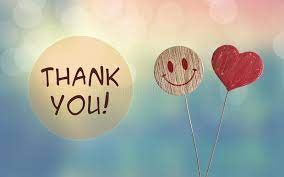